In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import glob
import os
import time

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
file_names = glob.glob(os.path.join(r'F:\DPS\Fareed\UMAFall_Dataset', "*"))
file_names = [file_names[0],file_names[3],file_names[6],file_names[9],file_names[13],file_names[17]]
file_names

['F:\\DPS\\Fareed\\UMAFall_Dataset\\UMAFall_Subject_01_ADL_Aplausing_1_2017-04-14_23-38-23.csv',
 'F:\\DPS\\Fareed\\UMAFall_Dataset\\UMAFall_Subject_01_ADL_HandsUp_1_2017-04-14_23-32-44.csv',
 'F:\\DPS\\Fareed\\UMAFall_Dataset\\UMAFall_Subject_01_ADL_MakingACall_1_2017-04-14_23-30-27.csv',
 'F:\\DPS\\Fareed\\UMAFall_Dataset\\UMAFall_Subject_01_ADL_OpeningDoor_1_2017-04-14_23-35-12.csv',
 'F:\\DPS\\Fareed\\UMAFall_Dataset\\UMAFall_Subject_01_ADL_Sitting_GettingUpOnAChair_1_2017-04-14_23-28-16.csv',
 'F:\\DPS\\Fareed\\UMAFall_Dataset\\UMAFall_Subject_01_ADL_Walking_2_2017-04-14_23-26-33.csv']

In [3]:
#Data 
final_data = pd.DataFrame()

#count to check how many files processed and are merged
count = 0

#get all csv files from the folder
#file_names = glob.glob(os.path.join(r'F:\DPS\Fareed\UMAFall_Dataset', "*"))

#Start time count to check execution time
start_time = time.time()

for i in range(5):
    
    data = pd.read_csv(file_names[i])
    a = data.head(32)
    a.loc[-1] = a.columns.values
    a.sort_index(inplace=True)
    a.reset_index(drop=True, inplace=True)
    data = data.iloc[32:]
    data.reset_index(drop=True, inplace=True)
    
    #Attribiutes
    name = str(a.values[3]).replace(" ", "")[8:-2]
    age = str(a.values[4]).replace(" ", "")[7:-2]
    gender = str(a.values[7]).replace(" ", "")[10:-2]
    movement = str(a.values[8]).replace(" ", "")[18:-2]
    movementboolean = str(a.values[9]).replace(" ", "")[18:-2]
    movementdescription = str(a.values[10]).replace(" ", "")[28:-2]
    
    new_data = pd.DataFrame(index = range(data.shape[0]))
    new_data['Name'] = name
    new_data['Age'] = age
    new_data['Gender'] = gender
    new_data['Movement'] = movement
    new_data['Timestamp'] = 0
    new_data['Sample_no'] = 0
    new_data['Accelerometer'] = 0
    new_data['Gyroscope'] = 0
    new_data['Magnetometer'] = 0
    new_data['Movement_bool'] = movementboolean
    new_data['Movement_description'] = movementdescription
    
    for i in range(len(data.values)):
        b = list(map(float,list(data.iloc[i])[0].replace(";",",").split(",")))
        new_data['Timestamp'][i] = b[0]
        new_data['Sample_no'][i] = b[1]
        new_data['Accelerometer'][i] = b[2]
        new_data['Gyroscope'][i] = b[3]
        new_data['Magnetometer'][i] = b[4]
    
    final_data = final_data.append(new_data)
    final_data.reset_index(drop = True, inplace = True)
    count = count + 1
    print("Number of Files completed are:- ",count)
end_time = time.time()
execution_time = end_time - start_time
print(f"Total Execution time is:- {execution_time:.6f} seconds")

Number of Files completed are:-  1
Number of Files completed are:-  2
Number of Files completed are:-  3
Number of Files completed are:-  4
Number of Files completed are:-  5
Total Execution time is:- 448.605786 seconds


# Data Preprocessing

In [4]:
final_data

,Name,Age,Gender,Movement,Timestamp,Sample_no,Accelerometer,Gyroscope,Magnetometer,Movement_bool,Movement_description
0,Subject_01,67,F,ADL,102,1,-0.138750,0.886872,0.331029,FALSE,Aplausing
1,Subject_01,67,F,ADL,102,2,-0.138140,0.886507,0.332372,FALSE,Aplausing
2,Subject_01,67,F,ADL,102,3,-0.134844,0.889558,0.331150,FALSE,Aplausing
3,Subject_01,67,F,ADL,102,4,-0.140215,0.886628,0.333714,FALSE,Aplausing
4,Subject_01,67,F,ADL,102,5,-0.139117,0.886262,0.334568,FALSE,Aplausing
...,...,...,...,...,...,...,...,...,...,...,...
32829,Subject_01,67,F,ADL,14761,296,-102.666664,-6.166667,70.666664,FALSE,Sitting_GettingUpOnAChair
32830,Subject_01,67,F,ADL,14809,297,-102.666664,-6.166667,70.666664,FALSE,Sitting_GettingUpOnAChair
32831,Subject_01,67,F,ADL,14862,298,-102.666664,-6.166667,70.666664,FALSE,Sitting_GettingUpOnAChair
32832,Subject_01,67,F,ADL,14912,299,-102.666664,-6.166667,70.666664,FALSE,Sitting_GettingUpOnAChair


In [5]:
final_data.shape

(32834, 11)

In [6]:
#Checking Null values
final_data.isnull().sum()

#There are no null values cause each and every csv that are merged has entire data complete samples

Name                    0
Age                     0
Gender                  0
Movement                0
Timestamp               0
Sample_no               0
Accelerometer           0
Gyroscope               0
Magnetometer            0
Movement_bool           0
Movement_description    0
dtype: int64

In [7]:
#Checking Duplicates
final_data.duplicated().sum()

#There are no duplicates cause each and every csv have different samples recorded

0

In [8]:
#Checking Variable types
final_data.dtypes

#Ignore some object types and foucs on Accelerometer,Gyroscope,Magnetometer,Movement_description, cause they are the one we 
#fit to model

Name                     object
Age                      object
Gender                   object
Movement                 object
Timestamp                 int64
Sample_no                 int64
Accelerometer           float64
Gyroscope               float64
Magnetometer            float64
Movement_bool            object
Movement_description     object
dtype: object

In [9]:
#Check all type of movement so we can convert them to a numerical value
final_data['Movement_description'].unique()

array(['Aplausing', 'HandsUp', 'MakingACall', 'OpeningDoor',
       'Sitting_GettingUpOnAChair'], dtype=object)

In [10]:
#Converting Categorical varioable into numerical variable manually
def mapping_variables(x):
    if x == 'Aplausing':
        return 1
    elif x == 'HandsUp':
        return 2
    elif x == 'MakingACall':
        return 3
    elif x == '':
        return 4
    elif x == 'OpeningDoor':
        return 5
    elif x == 'Sitting_GettingUpOnAChair':
        return 6
    else:
        return 7
final_data['Movement_description'] = final_data['Movement_description'].apply(mapping_variables)

In [11]:
final_data.dtypes

Name                     object
Age                      object
Gender                   object
Movement                 object
Timestamp                 int64
Sample_no                 int64
Accelerometer           float64
Gyroscope               float64
Magnetometer            float64
Movement_bool            object
Movement_description      int64
dtype: object

In [12]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32834 entries, 0 to 32833
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  32834 non-null  object 
 1   Age                   32834 non-null  object 
 2   Gender                32834 non-null  object 
 3   Movement              32834 non-null  object 
 4   Timestamp             32834 non-null  int64  
 5   Sample_no             32834 non-null  int64  
 6   Accelerometer         32834 non-null  float64
 7   Gyroscope             32834 non-null  float64
 8   Magnetometer          32834 non-null  float64
 9   Movement_bool         32834 non-null  object 
 10  Movement_description  32834 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 2.8+ MB


<AxesSubplot:>

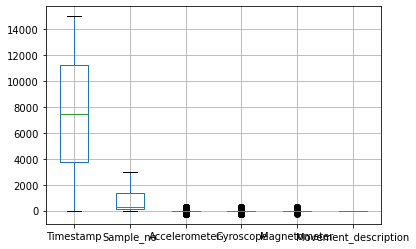

In [13]:
#Checking Outliers
final_data.boxplot()

In [14]:
#Checking coorelation
final_data.corr()

,Timestamp,Sample_no,Accelerometer,Gyroscope,Magnetometer,Movement_description
Timestamp,1.000000,0.493527,-0.037951,0.014810,0.007551,-0.000116
Sample_no,0.493527,1.000000,0.164706,-0.000362,-0.025284,-0.000253
Accelerometer,-0.037951,0.164706,1.000000,-0.187245,-0.656970,0.011041
Gyroscope,0.014810,-0.000362,-0.187245,1.000000,0.155585,-0.049754
Magnetometer,0.007551,-0.025284,-0.656970,0.155585,1.000000,0.013653
Movement_description,-0.000116,-0.000253,0.011041,-0.049754,0.013653,1.000000


In [15]:
final_data.head()

,Name,Age,Gender,Movement,Timestamp,Sample_no,Accelerometer,Gyroscope,Magnetometer,Movement_bool,Movement_description
0,Subject_01,67,F,ADL,102,1,-0.138750,0.886872,0.331029,FALSE,1
1,Subject_01,67,F,ADL,102,2,-0.138140,0.886507,0.332372,FALSE,1
2,Subject_01,67,F,ADL,102,3,-0.134844,0.889558,0.331150,FALSE,1
3,Subject_01,67,F,ADL,102,4,-0.140215,0.886628,0.333714,FALSE,1
4,Subject_01,67,F,ADL,102,5,-0.139117,0.886262,0.334568,FALSE,1


In [16]:
final_data['Movement_description'].unique()

array([1, 2, 3, 5, 6], dtype=int64)

In [17]:
#Check if data is balanced
final_data['Movement_description'].value_counts()

2    6579
5    6571
3    6564
1    6562
6    6558
Name: Movement_description, dtype: int64

# Splitting Data

In [18]:
X = final_data[['Accelerometer','Gyroscope','Magnetometer']]
Y = final_data['Movement_description']

In [19]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=100)

# Model Building

## Random Forest

In [20]:
RF = RandomForestClassifier(max_depth=2, random_state=0)
RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [21]:
#Prediction
y_pred = RF.predict(X_test)

In [22]:
#Classification Report
report1 = classification_report(y_test, y_pred)

In [23]:
print(report1)

              precision    recall  f1-score   support

           1       0.46      0.47      0.47       645
           2       0.46      0.54      0.50       691
           3       0.36      0.61      0.46       661
           5       0.82      0.44      0.57       655
           6       0.37      0.21      0.27       632

    accuracy                           0.46      3284
   macro avg       0.50      0.46      0.45      3284
weighted avg       0.50      0.46      0.46      3284



# Decision tree

In [28]:
from sklearn import tree

In [29]:
DT = tree.DecisionTreeClassifier()
DT = DT.fit(X_train, y_train)

In [30]:
#Prediction
y_pred = DT.predict(X_test)

In [31]:
#Classification Report
report2 = classification_report(y_test, y_pred)

In [32]:
print(report2)

              precision    recall  f1-score   support

           1       0.79      0.78      0.79       645
           2       0.73      0.75      0.74       691
           3       0.70      0.72      0.71       661
           5       0.82      0.80      0.81       655
           6       0.74      0.73      0.74       632

    accuracy                           0.76      3284
   macro avg       0.76      0.76      0.76      3284
weighted avg       0.76      0.76      0.76      3284



# Neural Network

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [25]:
# Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
# Train the model
epochs = 10
batch_size = 16

model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

# Evaluate the model on the test set
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Epoch 1/10
1663/1663 [==============================] - 2s 1ms/step - loss: 0.0000e+00 - accuracy: 0.1986 - val_loss: 0.0000e+00 - val_accuracy: 0.2098
Epoch 2/10
1663/1663 [==============================] - 2s 1ms/step - loss: 0.0000e+00 - accuracy: 0.1992 - val_loss: 0.0000e+00 - val_accuracy: 0.2098
Epoch 3/10
1663/1663 [==============================] - 2s 924us/step - loss: 0.0000e+00 - accuracy: 0.1992 - val_loss: 0.0000e+00 - val_accuracy: 0.2098
Epoch 4/10
1663/1663 [==============================] - 2s 964us/step - loss: 0.0000e+00 - accuracy: 0.1992 - val_loss: 0.0000e+00 - val_accuracy: 0.2098
Epoch 5/10
1663/1663 [==============================] - 2s 915us/step - loss: 0.0000e+00 - accuracy: 0.1992 - val_loss: 0.0000e+00 - val_accuracy: 0.2098
Epoch 6/10
1663/1663 [==============================] - 1s 886us/step - loss: 0.0000e+00 - accuracy: 0.1992 - val_loss: 0.0000e+00 - val_accuracy: 0.2098
Epoch 7/10
1663/1663 [==============================] - 2s 906us/step - loss: 0.